In [2]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from pathlib import Path
import matplotlib.pyplot as plt



In [ ]:
# traffic_crash_url = "https://data.cityofchicago.org/resource/85ca-t3if.json"
# people_url = "https://data.cityofchicago.org/resource/u6pd-qa9d.json"
# vehicles_url= "https://data.cityofchicago.org/resource/68nd-jvt3.json"

# people = requests.get(people_url).json()
#people_df = pd.DataFrame()
# people[0]

In [3]:
# Import csv files 
crashes_file = Path("Resources/Crashes.csv")
people_file = Path("Resources/People.csv")
vehicles_file = Path("Resources/Vehicles.csv")

# Create dataframe
crashes_df = pd.read_csv(crashes_file, encoding="ISO-8859-1")
people_df = pd.read_csv(people_file, encoding="ISO-8859-1")
vehicles_df = pd.read_csv(vehicles_file, encoding="ISO-8859-1")

C:\Users\csavi\AppData\Local\Temp\ipykernel_8360\727080347.py:8: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  people_df = pd.read_csv(people_file, encoding="ISO-8859-1")
C:\Users\csavi\AppData\Local\Temp\ipykernel_8360\727080347.py:9: DtypeWarning: Columns (21,40,41,42,44,48,49,50,55,58,59,61) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles_df = pd.read_csv(vehicles_file, encoding="ISO-8859-1")


In [ ]:
crashes_df.columns

In [ ]:
crashes_df.head()

In [ ]:
people_df.columns

In [ ]:
people_df.head()

In [ ]:
vehicles_df.columns


In [ ]:
vehicles_df.head()

In [43]:
# Traffic accidents in City of Chicago – When and where is it safest to travel through Chicago, looking at just serious injuries and fatalities, last 5 years (2018-2022)



In [44]:
# What are the most fatal intersections in Chicago?


In [4]:
# When are the most fatal months? (time series analysis) – Jian Liu

crash_month_summary = crashes_df['CRASH_MONTH'].value_counts().sort_index()
for month in range(1, 13):
    count = crash_month_summary.get(month, 0)
    print(f"Month {month}: {count} occurrences")


Month 1: 8195 occurrences
Month 2: 7963 occurrences
Month 3: 8551 occurrences
Month 4: 8532 occurrences
Month 5: 9825 occurrences
Month 6: 9601 occurrences
Month 7: 9262 occurrences
Month 8: 9229 occurrences
Month 9: 9600 occurrences
Month 10: 9910 occurrences
Month 11: 8794 occurrences
Month 12: 8933 occurrences


In [5]:
crash_type_by_month = crashes_df.groupby(['CRASH_MONTH', 'CRASH_TYPE']).size().unstack(fill_value=0)

print(crash_type_by_month)

CRASH_TYPE   INJURY AND / OR TOW DUE TO CRASH  NO INJURY / DRIVE AWAY
CRASH_MONTH                                                          
1                                        2474                    5721
2                                        2194                    5769
3                                        2426                    6125
4                                        2559                    5973
5                                        2831                    6994
6                                        2855                    6746
7                                        2806                    6456
8                                        2697                    6532
9                                        2747                    6853
10                                       2950                    6960
11                                       2587                    6207
12                                       2643                    6290


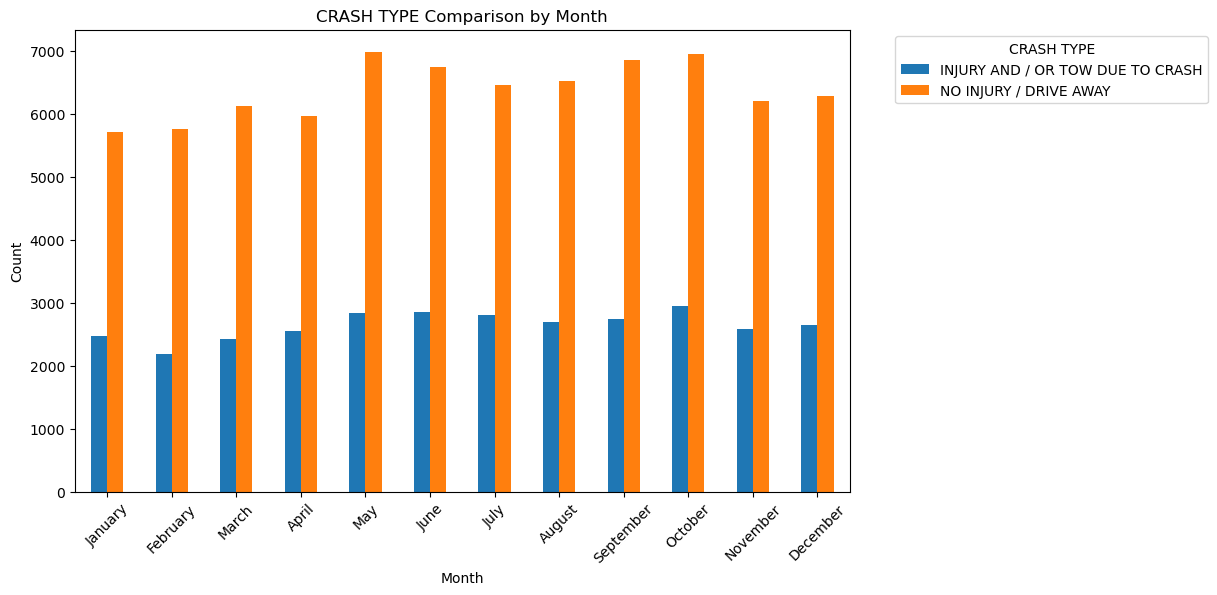

In [6]:

# Define the data
data = {
    'CRASH_TYPE': ['INJURY AND / OR TOW DUE TO CRASH', 'NO INJURY / DRIVE AWAY'],
    '1': [2474, 5721],
    '2': [2194, 5769],
    '3': [2426, 6125],
    '4': [2559, 5973],
    '5': [2831, 6994],
    '6': [2855, 6746],
    '7': [2806, 6456],
    '8': [2697, 6532],
    '9': [2747, 6853],
    '10': [2950, 6960],
    '11': [2587, 6207],
    '12': [2643, 6290]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)
df.set_index('CRASH_TYPE', inplace=True)


# Create a list of month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a grouped bar chart
ax = df.T.plot(kind='bar', figsize=(10, 6))
plt.title('CRASH TYPE Comparison by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(len(month_names)), month_names, rotation=45)  # Use month names for x-axis labels

# Move the legend outside the plot area
plt.legend(title='CRASH TYPE', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

#The highest count of "no injury / drive away" accidents are in May and October
#The highest count of "injury and / or tow due to crash" accidents are in October. 

In [7]:
len(crashes_df["INJURIES_FATAL"])

108395

In [8]:
fatal_injuries_by_month = crashes_df[crashes_df['INJURIES_FATAL'] == 1]

fatal_injuries_by_month = fatal_injuries_by_month.groupby('CRASH_MONTH').size()

print(fatal_injuries_by_month)

CRASH_MONTH
1     10
2      9
3      7
4     11
5      9
6      8
7     17
8      9
9     11
10     9
11     6
12    16
dtype: int64


In [9]:
# Group the data by 'CRASH_MONTH' and sum the 'INJURIES_FATAL' values
fatal_injuries_by_month = crashes_df.groupby('CRASH_MONTH')['INJURIES_FATAL'].sum()

# Print the total fatal injuries for each month
print(fatal_injuries_by_month)

CRASH_MONTH
1     12.0
2     14.0
3     11.0
4     11.0
5      9.0
6      8.0
7     19.0
8     12.0
9     15.0
10    11.0
11    10.0
12    18.0
Name: INJURIES_FATAL, dtype: float64


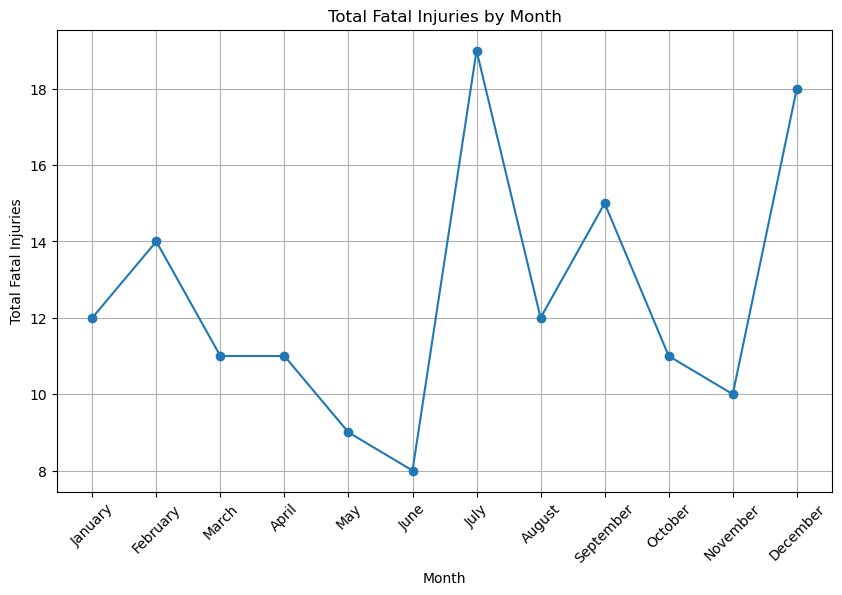

In [10]:
# Group the data by 'CRASH_MONTH' and sum the 'INJURIES_FATAL' values
fatal_injuries_by_month = crashes_df.groupby('CRASH_MONTH')['INJURIES_FATAL'].sum()

# Create a line graph
plt.figure(figsize=(10, 6))
fatal_injuries_by_month.plot(marker='o', linestyle='-')
plt.title('Total Fatal Injuries by Month')
plt.xlabel('Month')
plt.ylabel('Total Fatal Injuries')

# Customize the x-axis tick labels to display month names
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.xticks(fatal_injuries_by_month.index, month_names, rotation=45)

# Show the plot
plt.grid(True)
plt.show()

In [11]:
# Get the counts of "CRASH_DATE" by month
crash_date_by_month = people_df['CRASH_DATE'].value_counts().sort_index()

# Convert the index (month) to a datetime object
crash_date_by_month.index = pd.to_datetime(crash_date_by_month.index)

# Group the data by month and sum the counts
monthly_counts = crash_date_by_month.resample('M').sum()

print(monthly_counts)

CRASH_DATE
2022-01-31    17164
2022-02-28    16873
2022-03-31    18308
2022-04-30    18478
2022-05-31    21376
2022-06-30    21170
2022-07-31    20063
2022-08-31    19753
2022-09-30    20990
2022-10-31    21630
2022-11-30    18827
2022-12-31    19177
Freq: M, Name: count, dtype: int64


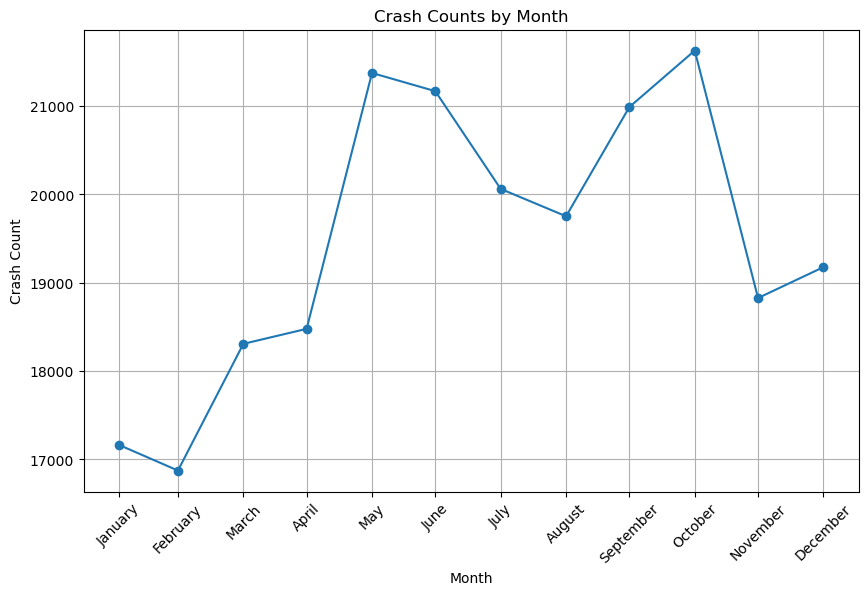

In [12]:
# Get the counts of "CRASH_DATE" by month
crash_date_by_month = people_df['CRASH_DATE'].value_counts().sort_index()

# Convert the index (month) to a datetime object
crash_date_by_month.index = pd.to_datetime(crash_date_by_month.index)

# Group the data by month and sum the counts
monthly_counts = crash_date_by_month.resample('M').sum()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.title('Crash Counts by Month')
plt.xlabel('Month')
plt.ylabel('Crash Count')
plt.grid(True)

# Customize the x-axis tick labels to display month names
custom_tick_labels = [month.strftime('%B') for month in monthly_counts.index]
plt.xticks(monthly_counts.index, custom_tick_labels, rotation=45)

# Show the plot
plt.show()

In [ ]:
#Crash count is highest in October, followed by May and finally, June.

In [13]:
crash_date_summary = vehicles_df['CRASH_DATE'].value_counts().sort_index()
for month in range(1, 13):
    count = crash_date_summary.get(month, 0)
    print(f"Month {month}: {count} occurrences")

Month 1: 2 occurrences
Month 2: 2 occurrences
Month 3: 4 occurrences
Month 4: 2 occurrences
Month 5: 2 occurrences
Month 6: 2 occurrences
Month 7: 4 occurrences
Month 8: 9 occurrences
Month 9: 5 occurrences
Month 10: 2 occurrences
Month 11: 2 occurrences
Month 12: 5 occurrences


In [ ]:
#Total fatal injuries observed by month, is highest in July, followed by December, and finally, September.

Analysis of Accident Causes (Cynthia Saving)

What are the most common causes for all accidents?
1. Failing to Yield Right of Way
2. Following Too Closely
3. Improper Overtaking/Passing
4. Failing to Reduce Speed to Avoid Crash
5. Driving Skills/Knowledge/Experience

What are most common causes for accidents with injuries?
1. Failing to Yield Right of Way
2. Following Too Closely
3. Failing to Reduce Speed to Avoid Crash
4. Disregarding Traffic Signals
5. Improper Turning/No Signal

However, 47% of all accidents and 36% of accidents with injuries do not have a primary contributory cause reported.

In [46]:
# What are the most common causes? (summary statistics) – Cynthia Saving

# Counts of top 10 primary causes all accidents
causes_counts = crashes_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(10)

# Create horizontal bar chart
y_axis = causes_counts.index
width = causes_counts.values
plt.barh(y_axis, width, height=0.8, align='center')
plt.title("Top Causes of All Accidents in Chicago")
plt.xlabel("Number of Accidents in 2022")
plt.savefig("Images/Causes.png")
plt.show()

In [ ]:
# Calculate percentage of total accidents that do not have primary cause reported.
total_accidents = len(crashes_df)
unable_to_determine = crashes_df['PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE'
not_applicable = crashes_df['PRIM_CONTRIBUTORY_CAUSE'] == 'NOT APPLICABLE'
no_causes_count = len(crashes_df.loc[unable_to_determine]) + len(crashes_df.loc[not_applicable])
no_cause_percent = round(no_causes_count / total_accidents * 100)
print(f"{no_cause_percent}% of all accidents do not have a primary contributory cause reported.") 


In [ ]:
# Filter dataframe to only rows with injuries
injuries = crashes_df['INJURIES_TOTAL'] > 0
inj_causes_df = crashes_df.loc[injuries]

#Counts of top 10 primary causes of accidents with injuries
inj_cause_counts = inj_causes_df.loc[injuries]['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(10)

# Create horizontal bar chart
y_axis = inj_cause_counts.index
width = inj_cause_counts.values
plt.barh(y_axis, width, height=0.8, align='center')
plt.title("Top Causes of Accidents with Injuries in Chicago")
plt.xlabel("Number of Accidents in 2022")
plt.savefig("Images/Injury_Causes.png")
plt.show()


In [ ]:
# Calculate percentage of accidents with injuries that do not have primary cause reported.
inj_total_accidents = len(inj_causes_df)
inj_unable_to_determine = inj_causes_df['PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE'
inj_not_applicable = inj_causes_df['PRIM_CONTRIBUTORY_CAUSE'] == 'NOT APPLICABLE'
inj_no_causes_count = len(inj_causes_df.loc[unable_to_determine]) + len(inj_causes_df.loc[not_applicable])
inj_no_cause_percent = round(inj_no_causes_count / inj_total_accidents * 100)
print(f"{inj_no_cause_percent}% of accidents with injuries do not have a primary contributory cause reported.") 

In [14]:
# What driver age is most prevalent? (comparison) – Sonia Singh

filtered_age_df = people_df[people_df['PERSON_TYPE'].str.contains('DRIVER', case= False)][['PERSON_TYPE', 'AGE']]
filtered_age_df = filtered_age_df.dropna(subset= ['AGE'])
age_count_df = pd.DataFrame(filtered_age_df['AGE'].value_counts())
age_count_df

,count
AGE,
27.0,3776
29.0,3746
28.0,3703
30.0,3634
31.0,3616
...,...
102.0,3
110.0,1
8.0,1


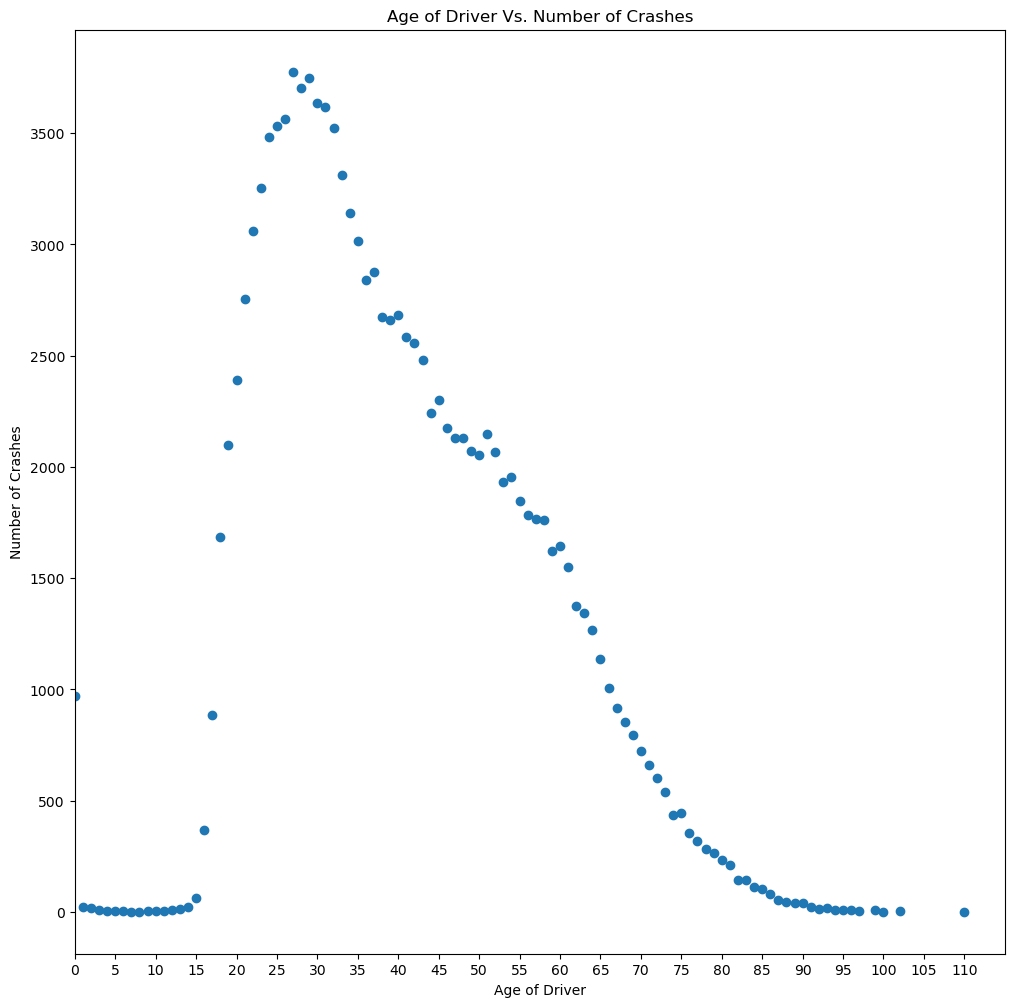

In [15]:
#age comparison visualization - Sonia 
plt.figure(figsize=(12, 12))

plt.scatter(age_count_df.index, age_count_df['count'])
plt.xticks(range(0, 115, 5))
plt.xlim(0, 115)
plt.xlabel('Age of Driver')
plt.ylabel('Number of Crashes')
plt.title('Age of Driver Vs. Number of Crashes')
plt.show()

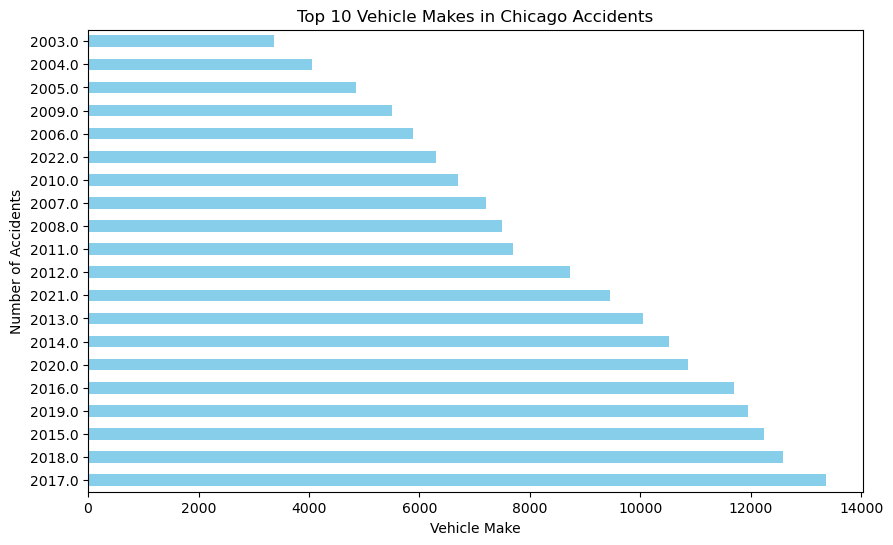

In [16]:
# What vehicle age is most common? (correlation) – Tony Quintana

#Assuming 'Vehicle_Make' is the column representing the vehicle makes
vehicle_make_counts = vehicles_df['VEHICLE_YEAR'].value_counts()
# Select the top 10 vehicle makes
top_10 = vehicle_make_counts.head(20)
# Visualization of the top 10 vehicle makes
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color='skyblue')
plt.title('Top 10 Vehicle Makes in Chicago Accidents')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Accidents')
plt.show()

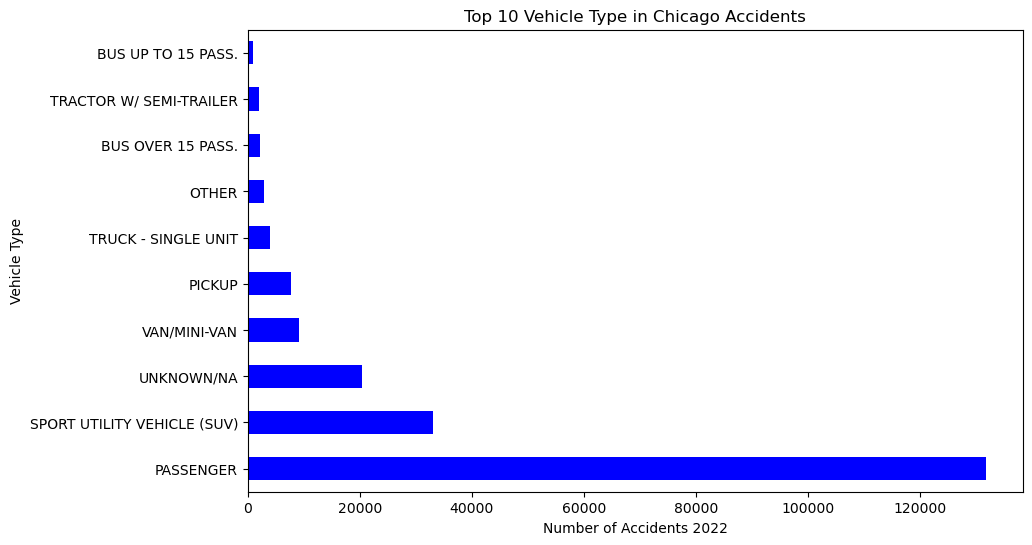

In [73]:
# What vehicle make and/or Type is most common? (comparison) – Sean Bell
# tYPE is the column representing the vehicle makes
vehicle_type_counts = vehicles_df['VEHICLE_TYPE'].value_counts()

# Select the top 10 vehicle makes
top_10 = vehicle_type_counts.head(10)

# Visualization of the top 10 vehicle makes
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color='blue')
plt.title('Top 10 Vehicle Types in Chicago Accidents')
plt.ylabel('Vehicle Type')
plt.xlabel('Number of Accidents 2022')
plt.show()
plt.savefig("top10vehicletypesinchicagoaccdents.png")

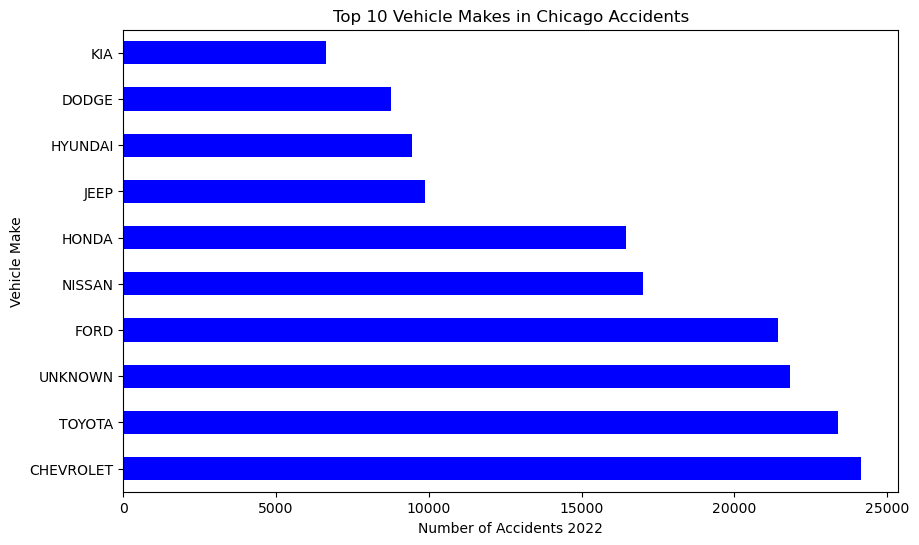

<Figure size 640x480 with 0 Axes>

In [18]:
# What vehicle make and/or Type is most common? (comparison) – Sean Bell

#MAKE is the column representing the vehicle makes
vehicle_make_counts = vehicles_df['MAKE'].value_counts()

# Select the top 10 vehicle makes
top_10 = vehicle_make_counts.head(10)

# Visualization of the top 10 vehicle makes
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color='blue')
plt.title('Top 10 Vehicle Makes in Chicago Accidents')
plt.ylabel('Vehicle Make')
plt.xlabel('Number of Accidents 2022')
plt.show()
plt.savefig("Images/vehiclemakes.png")
